In [ ]:
import pandas as pd
import os

In [42]:
def calculate_time_averages(df,method):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
            # print(row_count)
        else:
            results.append([row_count,method,place_value,float(data[i][0])])
            row_count+=1
    return results
            
    
    
    

In [43]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [45]:
root_path = r"C:\Users\takaharayota\Research\Exp1-data\中山先生\times"
files_paths = [
     root_path + r"\音無し.txt",
    root_path + r"\離散指数.txt",
     root_path + r"\連続指数.txt",
      root_path + r"\連続線形.txt",
       root_path + r"\離散線形.txt",
    
]
# 全てのフォルダを処理し、結果を統合
all_results = []
for i, file_path in enumerate(files_paths):
    df = calculate_time_averages(read_txt_to_dataframe(file_path),i-1)
    
    all_results.extend(df)
columns = ['Subject','Method', 'Place', 'Time']
df_all = pd.DataFrame(all_results, columns=columns)

print(df_all)


    Subject  Method  Place      Time
0         0      -1      1  3.063015
1         1      -1      1  3.319511
2         2      -1      1  2.047012
3         3      -1      1  1.846992
4         4      -1      1  1.861816
..      ...     ...    ...       ...
95        0       3      3  0.367828
96        1       3      3  3.999542
97        2       3      3  3.833801
98        3       3      3  5.422180
99        4       3      3  3.945709

[100 rows x 4 columns]


In [46]:
# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

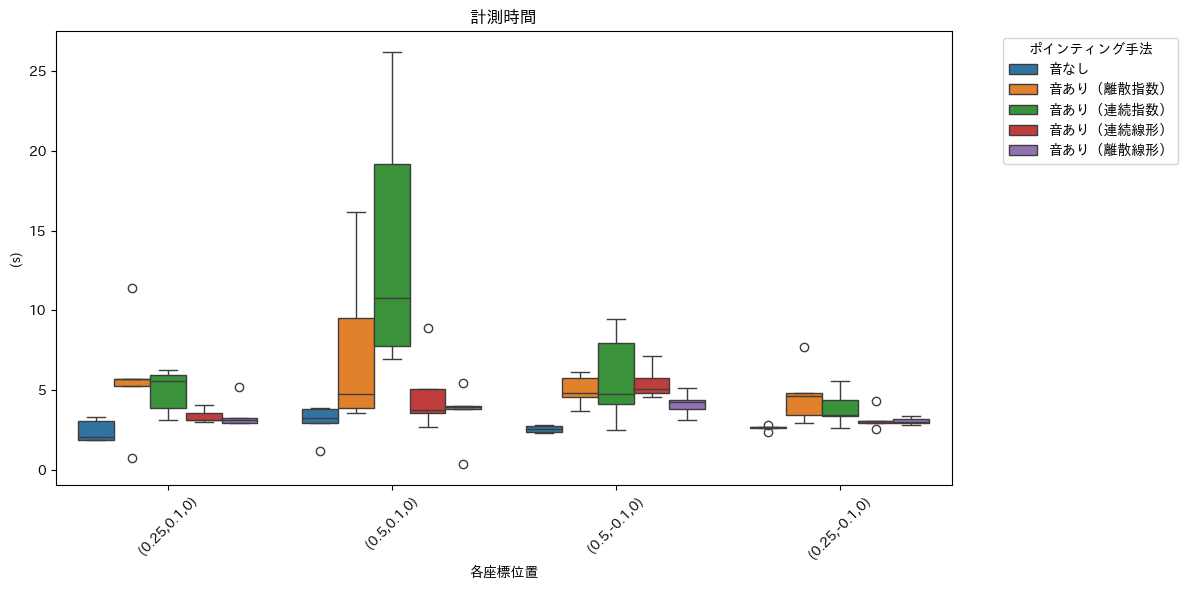

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音なし',
    0: '音あり（離散指数）',
    1: '音あり（連続指数）',
    2: '音あり（連続線形）',
    3: '音あり（離散線形）'

}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Time', hue='Method_Label', data=df_all)
plt.title('計測時間')
plt.xlabel('各座標位置')
plt.ylabel('(s)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
